In [1]:
import cv2
import numpy as np
import time
import math
import heapq
import matplotlib.pyplot as plt
plt.ion()

height = 200
width = 300

# rad = input("Enter the radius of the robot: ")
# rad = int(rad)
# clearance = input("Enter the clearance for the robot: ")
# clearance = int(clearance)

# blank_image = np.zeros((height, width, 3), np.uint8)


def check(x, y, r, c, c1):
    # Rhombus
    if ((x * (-3 / 5) + y - 55 - r - c < 0) and (x * (3 / 5) + y - 325 - r - c < 0) and (
            x * (-3 / 5) + y - 25 + r + c > 0) and (x * (3 / 5) + y - 295 + r + c > 0)):
        return True

    # polygon - rhombus
    elif x * (7 / 5) + y - 120 > 0 and x * (-6 / 5) + y + 10 - c - r < 0 and x * (6 / 5) + y - 170 - c - r < 0 and x * (
            -7 / 5) + y + 90 + c + r > 0:
        return True

    # polygon - triangle1
    elif y - 15 + c + r > 0 and x * (7 / 5) + y - 120 < 0 and x * (-7 / 5) + y + 20 < 0:
        return True

    # polygon - triangle2
    elif y + 13 * x - 340 + c + r + c1 > 0 and x + y - 100 - r - c < 0 and x * (-7 / 5) + y + 20 > 0:
        return True

    # rectangle -angled
    elif (200 - y) - (1.73) * x + 135 + r + c > 0 and (200 - y) + (0.58) * x - 96.35 - r - c <= 0 and (200 - y) - (
    1.73) * x - 15.54 - r - c <= 0 and (200 - y) + (0.58) * x - 84.81 + r + c >= 0:
        return True

    else:
        return False


def obstaclecheck_circle(x, y, r, c):
    if (((x - 225) ** 2) + ((y - 50) ** 2) < ((25 + r + c) ** 2)):
        return True
    else:
        return False


def obstaclecheck_ellipse(x, y, r, c):
    if (((x - 150) ** 2 / (40 + c + r) ** 2) + ((y - 100) ** 2) / (20 + c + r) ** 2) <= 1:
        return True
    else:
        return False


def obstacle_check(new_i, new_j, r, c):
    c1 = 40
    if obstaclecheck_circle(new_i, new_j, r, c):
        return True
    elif obstaclecheck_ellipse(new_i, new_j, r, c):
        return True
    elif check(new_i, new_j, r, c, c1):
        return True
    elif ((new_i - r - c < 0) or (200-new_j - r - c < 0) or (new_i + r + c > width - 1) or (200-new_j + r + c > height - 1)):
        return True
    else:
        return False
    
def goalcheck_circle(x, y, goal_x, goal_y):
    if (((x - goal_x) ** 2) + ((y - goal_y) ** 2) < ((1.5) ** 2)):
        return True
    else:
        return False

def obstacle_map(rad,clearance): 
    plot_x =[]
    plot_y =[]
    rigid_x=[]
    rigid_y=[]
    for x in range(300):
        for y in range(200):
            if obstacle_check(x, 200-y, rad, clearance):
                rigid_x.append(x)
                rigid_y.append(y)
#                 blank_image[x, y] = (150, 150, 150)
            if obstacle_check(x, 200-y, 0, 0):
                plot_x.append(x)
                plot_y.append(y)
    return plot_x, plot_y,rigid_x, rigid_y
    
#                 blank_image[x, y] = (255, 255, 255)          
#     cv2.imshow("blank_image",blank_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# print("Enter 1 to select the Goal and Start point by clicking on the image")
# print("Enter 2 to manually enter the Goal and Start Node")
# i = input("Enter your choice: ")
# i = int(i)

# if (i == 1):
#     m = 0
#     a = []


#     def draw_circle(event, x, y, flags, param):
#         global m
#         global mouseX, mouseY
#         if event == cv2.EVENT_FLAG_LBUTTON:
#             cv2.circle(blank_image, (x, y), 5, (255, 0, 0), -1)
#             a.append(x)
#             a.append(y)
#             mouseX, mouseY = x, y
#             if len(a) > 2:
#                 cv2.circle(blank_image, (a[2], a[3]), 5, (255, 0, 0), -1)
#             print("coordinates of the start and goal node = ")
#             print(mouseX, 200 - mouseY)
#             m = m + 1


#     cv2.namedWindow('image')
#     cv2.setMouseCallback('image', draw_circle)

#     while (1):
#         cv2.imshow('image', blank_image)
#         k = cv2.waitKey(20) & 0xFF
#         if k == 27 or m == 2:
#             cv2.waitKey(1000)
#             cv2.destroyAllWindows()
#             break
#     cv2.circle(blank_image, (a[2], a[3]), 2, (255, 0, 0), -1)
#     w = a[0]
#     x = a[1]
#     y = a[2]
#     z = a[3]
#     c2 = 40
#     if obstacle_check(w, x, rad, clearance, c2):
#         print(" Start point - Obstacles detected or the points are out of the maze")
#         exit()
#     elif obstacle_check(y, z, rad, clearance, c2):
#         print(" Goal point - Obstacles detected or the points are out of the maze")
#         exit()
#     else:
#         print("\n")
#         print("***********Wait till the path gets generated - max wait time -180 seconds**********")
#         for i in range(width):
#             for j in range(height):
#                 inner_dict = {}
#                 function(i, j, rad, clearance, c2)
#         start_time = time.time()
#         short_path = dijkstra(maze, (w, x), (y, z))

# if (i == 2):
#     w = input("Enter x coordinates for the Start point : ")
#     x = input("Enter y coordinates for the Start point : ")
#     y = input("Enter x coordinates for the Goal point : ")
#     z = input("Enter x coordinates for the Goal point : ")

#     w = int(w)
#     x = int(x)
#     x = 200 - x
#     y = int(y)
#     z = int(z)
#     z = 200 - z

#     c2 = 40
#     if obstacle_check(w, x, rad, clearance, c2):
#         print(" Start point - Obstacles detected or the points are out of the maze")
#         exit()
#     elif (y, z, rad, clearance, c2):
#         print(" Goal point - Obstacles detected or the points are out of the maze")obstacle_check
#         exit()
#     else:
#         print("\n")
#         print("***********Wait till the path gets generated - max wait time -120 seconds**********")
#         for i in range(width):
#             for j in range(height):
#                 inner_dict = {}
#                 function(i, j, rad, clearance, c2)
#         start_time = time.time()
#         short_path = dijkstra(maze, (w, x), (y, z))
#         print("--- %s seconds ---" % (time.time() - start_time))


In [2]:
# def coordinates(step_size, theta):
#     theta = math.radians(theta)
#     X = step_size*math.cos(theta)
#     Y = step_size*math.sin(theta)
#     return X, Y
    

In [44]:
def action_model(step_size, theta, current_node):   

    theta_r = math.radians(theta)
#     theta_start_r = math.radians(theta_start)
    current_theta = math.radians(current_node[1][2])
    actions = [[step_size*math.cos(2*theta_r + current_theta), step_size*math.sin(2*theta_r + current_theta),2*theta ,1],
               [step_size*math.cos(theta_r + current_theta), step_size*math.sin(theta_r + current_theta),theta ,1],
               [step_size*math.cos(0+current_theta), step_size*math.sin(0+current_theta),0,1], 
               [step_size*math.cos(-theta_r+current_theta ), step_size*math.sin(-theta_r+current_theta),-theta,1],
               [step_size*math.cos(-2*theta_r + current_theta), step_size*math.sin(-2*theta_r +current_theta),-2*theta,1]]
    return actions

# def main():
#     x_start = 0
#     y_start = 0
#     theta_start = 0
#     theta = 30
    
#     x_goal = 3
#     y_goal = 1
#     theta_goal = 0
    
    
#     start_node = (x_start, y_start, theta_start)
#     goal_node = (x_goal, y_goal, theta_goal)
#     robot_radius = 0
#     clearance = 0
#     step_size = 1
    
#     obstacle_map(robot_radius, clearance)     
#     a_star(start_node,goal_node, step_size, theta, robot_radius, clearance)
    
    
    
def main():
 
     #x_start = 50
#     y_start = 30 
#     theta_start = 60 
#     theta = 30 
     
#     x_goal = 150
#     y_goal = 150
#     theta_goal = 0 

    x_start = 0
    y_start = 0 
    theta_start = 0 
    theta = 30 
     
    x_goal = 10
    y_goal = 10
    theta_goal = 0 
      
    
    start_node = (x_start, y_start, theta_start) 
    goal_node = (x_goal, y_goal, theta_goal) 
    robot_radius = 0 
    clearance = 0 
    step_size = 1 
     
#     plt.xlim(0,5) 
#     plt.ylim(0,5) 
    
    plt.xlim(0,300) 
    plt.ylim(0,200) 

    plot_x, plot_y, rigid_x, rigid_y = obstacle_map(robot_radius, clearance)  
    
    plt.plot(rigid_x,rigid_y,".y") 
    plt.plot(plot_x,plot_y,".k") 
    
    path, x_explored, y_explored = a_star(start_node,goal_node, step_size, theta, robot_radius, clearance) 
    #     a_star(start_node,goal_node, step_size, theta, robot_radius, clearance) 
    path = path[::-1] 
    x_path = [path[i][0] for i in range(len(path))] 
    y_path = [path[i][1] for i in range(len(path))] 
    plt.plot(x_path,y_path,"-r") 
     

 
    plt.show() 
    plt.pause(5) 
    plt.close()


In [36]:
print(action_model(1, 30,(1, (1, 0.5, 30), (2.0, 0.5, 30.0)) ))

[[6.123233995736766e-17, 1.0, 60, 1], [0.5000000000000001, 0.8660254037844386, 30, 1], [0.8660254037844387, 0.49999999999999994, 0, 1], [1.0, 0.0, -30, 1], [0.8660254037844387, -0.49999999999999994, -60, 1]]


In [37]:
def cost2go(pt1, pt2):
    dist = math.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)
    return dist
    

In [38]:
def threshold(x,y,th,thresh,theta):
    x = (round(x * 2) / 2)/thresh
    y = (round(y * 2) / 2)/thresh
    th = (round(th/theta)*theta)/theta

#     return x,y, theta         
    
    return (x*thresh,y*thresh,th*theta)

In [39]:
print(threshold(3,1,0,1.5,30))

(3.0, 1.0, 0.0)


In [47]:
def a_star(start_node,goal_node, step_size, theta, rad, clearance):
#     print("a_star")
    goal_node = threshold(goal_node[0], goal_node[1], goal_node[2], 1.5, theta)
#     print(goal_node)
    visited_nodes = np.zeros((600,400,int(360/theta)))
    start = (0,start_node,None)       # cost, node, parent node
    goal = (0,goal_node,None)
#     actions = action_model(step_size, theta, start_node[2])
#     print(actions)

    
    nodes = []
    path_nodes = []
    heapq.heappush(nodes,(start))
#     print(nodes)

    x_explored=[]
    y_explored=[]

    while len(nodes)>0:
#         print("in while")
#         print(nodes)
        current_node = heapq.heappop(nodes)
        heapq.heappush(path_nodes,current_node)
        x_explored.append(current_node[1][0])
        y_explored.append(current_node[1][1])
#         print("current node")
#         print(current_node)
        # print(path_nodes)

        #x_explored.append(current_node[1][0])
        #y_explored.append(current_node[1][1])
        
        actions = action_model(step_size, theta, current_node)

        for new_pos in actions:
            angle = new_pos[2] + current_node[1][2]
#             print("angle = ", angle)

                

            
    
            if(angle < 0):
                angle = angle + 360
#                 print("angleeeeee", angle)
            if(angle > 360):
                angle = angle -360
#                 print("angleeeeeeeeeeeeeeeee", angle)
            if(angle == 360):
                angle = 0
#                 print("angleeeeeeeeeeeeeeeee", angle)


            node = (current_node[1][0] + new_pos[0],
                             current_node[1][1] + new_pos[1], angle)
            node = threshold(node[0],node[1],node[2],0.5,theta)
            node_cost = current_node[0] + new_pos[3] + cost2go(node, goal[1])
                
            node_parent = current_node[1]
            
            if obstacle_check(node[0],200-node[1],rad, clearance) == False:
#                 print("efw", node[2])
#                 print("hefgef",int(node[2]/theta))
                if(visited_nodes[int(node[0]/0.5)][int(node[1]/0.5)][int(node[2]/theta)] == 0):
#                     print(int(node[0]/0.5), int(node[1]/0.5) , int(node[2]/theta))
#                     print("visited")
                    plt.plot([node[0],node_parent[0]], [node[1], node_parent[1]], "-c")
                    new_node = (node_cost,node,node_parent) 
                    heapq.heappush(nodes,(new_node))
                    visited_nodes[int(node[0]/0.5)][int(node[1]/0.5)][int(node[2]/theta)] = 1
#                     print(visited_nodes[int(node[0]/0.5)][int(node[1]/0.5)][int(node[2]/theta)])


        if goalcheck_circle(current_node[1][0], current_node[1][1], goal_node[0], goal_node[1]):
            print('Goal reached')
            print("acca")
            path = []
            print("path_nodes",path_nodes)
            length = len(path_nodes)
            path.append(path_nodes[length-1][1])
            #print(path)
            parent = path_nodes[length-1][2]
            #print(parent)
            while parent != None: 
                print("while")
                for i in range(length):
                    X = path_nodes[i]
                    print("for")
                    #print(X[1])
                    if X[1] == parent:
                        parent = X[2]
                        #print("if")
                        #print(parent)
                        path.append(X[1])
            print("pathhhhhhhhhhhh")
            print(path)
            return path,x_explored,y_explored

        #if (len(x_explored))%500 == 0:
        #        #print("YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY")
        #        plt.plot(x_explored,y_explored, "3c")
        #        plt.pause(0.00001)

20:13:35
Goal reached
acca
path_nodes [(0, (0, 0, 0), None), (14.0862523283024, (0.5, 1.0, 60.0), (0, 0, 0)), (14.0862523283024, (1.0, 0.5, 30.0), (0, 0, 0)), (14.45362404707371, (1.0, 0.0, 0.0), (0, 0, 0)), (27.107067608473706, (1.5, 1.5, 30.0), (0.5, 1.0, 60.0)), (27.107067608473706, (1.5, 1.5, 60.0), (1.0, 0.5, 30.0)), (27.127846907094696, (1.0, 2.0, 60.0), (0.5, 1.0, 60.0)), (27.127846907094696, (2.0, 1.0, 30.0), (1.0, 0.5, 30.0)), (27.465670731442348, (1.0, 1.5, 90.0), (1.0, 0.5, 30.0)), (27.465670731442348, (1.5, 1.0, 0.0), (0.5, 1.0, 60.0)), (27.50599467667662, (0.5, 2.0, 90.0), (0.5, 1.0, 60.0)), (27.50599467667662, (2.0, 0.5, 0.0), (1.0, 0.5, 30.0)), (27.833042450213657, (1.5, 1.0, 60.0), (1.0, 0.0, 0.0)), (27.87336639544793, (2.0, 0.5, 30.0), (1.0, 0.0, 0.0)), (27.892500803168097, (0.0, 2.0, 120.0), (0.5, 1.0, 60.0)), (27.892500803168097, (2.0, 0.0, 330.0), (1.0, 0.5, 30.0)), (28.259872521939407, (2.0, 0.0, 0.0), (1.0, 0.0, 0.0)), (39.07292370820436, (2.0, 2.5, 60.0), (1.5, 1

for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for
for


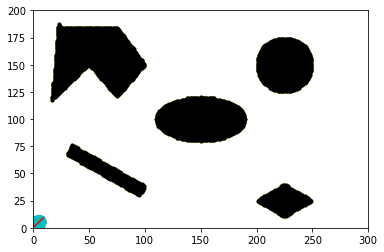

20:13:47


In [48]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
main()
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

In [33]:
print(path_nodes)

NameError: name 'path_nodes' is not defined

In [73]:
print(int(360/30))

12


In [107]:
print(goal_node)

NameError: name 'goal_node' is not defined